
# 章節 7 定位程式實作

author: 鍾皓軒 （臺灣行銷研究有限公司創辦人）

## 主題如下：

### 情境主題
* 產業：影音串流商
* 產品：主要透過採購影片的方式向各片商採購影音產品，如：韓劇、日劇
等產品，串流商本身未產製任何影片
* 內部成本資料：各片商提供
* 外部輿情資料蒐集：透過PTT 網路輿情，搜集到相關影音內容的評論
* 面對難題：
    * 採購人員如何用最低成本，帶來最多觀眾呢？
    * 在眾多的影片中，如何列出採購的優先順序？


## 資料
ptt資料～！ 
* 可以參考本[notebook](https://github.com/HowardNTUST/Marketing-Data-Science-Application/blob/master/cost_effect_gps_positioning/01_ptt_%E7%88%AC%E8%B3%87%E6%96%99%E7%AF%84%E4%BE%8B.ipynb)抓取自己想要的資料
* 或者直接使用我們這邊提供的[範例資料與分析程式碼](https://github.com/HowardNTUST/Marketing-Data-Science-Application/blob/master/cost_effect_gps_positioning/%E8%B3%87%E6%96%99%E6%89%93%E5%8C%85.zip)



In [2]:

import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import pandas as pd
import numpy as np
import jieba
jieba.set_dictionary('dict.txt.big')

In [3]:

#------------資料前處理-----------------
# 讀入爬蟲資料
KoreaDrama=pd.read_csv('KoreaDrama_re.csv') #開啟檔案

# 無意義字元列表，可以自行新增
removeword = ['span','class','f3','https','imgur','h1','_   blank','href','rel',
              'nofollow','target','cdn','cgi','b4','jpg','hl','b1','f5','f4',
              'goo.gl','f2','email','map','f1','f6','__cf___','data','bbs'
              'html','cf','f0','b2','b3','b5','b6','原文內容','原文連結','作者'
              '標題','時間','看板','<','>','，','。','？','—','閒聊','・','/',
              ' ','=','\"','\n','」','「','！','[',']','：','‧','╦','╔','╗','║'
              ,'╠','╬','╬',':','╰','╩','╯','╭','╮','│','╪','─','《','》','_'
              ,'.','、','（','）','　','*','※','~','○','”','“','～','@','＋']

#設定你關心的影劇名稱
movie = ['成為王的男人','皇后的品格','赤月青日','神的測驗',
        '死之詠讚','王牌大律師','Priest驅魔者','加油吧威基基',
        '皮諾丘','魔女寶鑑','好運羅曼史','購物王路易','七次初吻',
        '男朋友','請回答1997','來自星星的你']

# 將我們關心的影劇名稱加入jieba的字典裡面
for i in movie:
    jieba.add_word(i)
    

# 豆瓣上面的評分
bean = [6.9, 7.5, 8.6, 7.8, 8.5, 9.3, 6.8, 8.6, 8.2, 5.9, 6.7, 7.2, 5.8, 7.0, 9.0, 8.3]
score_avg = np.mean(bean)

import matplotlib.pyplot as plt

KoreaDrama['標題與內容'] = KoreaDrama['標題'] +  KoreaDrama['內容']

# 移除無意義字元列
'好棒棒'.replace('好', '')

for word in removeword:
    KoreaDrama['標題與內容'] = KoreaDrama['標題與內容'].str.replace(word,'')

#所有文章和標題都串在一起
theSTR = KoreaDrama['標題與內容'].tolist() 
theSTR = ''.join(theSTR ) # 「標題與內容」全部併在一起



#切詞
words = list(jieba.cut(theSTR))

#以影劇為單位，去計算每個影劇，在所有資料中的聲量
words.count('來自星星的你')

mv_voice= []
for j in movie:
    mv_voice.append(words.count(j))

# 計算聲量的平均
avg=np.mean(mv_voice)


Building prefix dict from /home/howard/Desktop/定位/02_產品價值分類模型與實戰/dict.txt.big ...
Loading model from cache /tmp/jieba.uc407d25236ca32467e515dcd62b092fd.cache
Loading model cost 0.428 seconds.
Prefix dict has been built succesfully.


## 基礎點陣圖與cp值清單

No handles with labels found to put in legend.


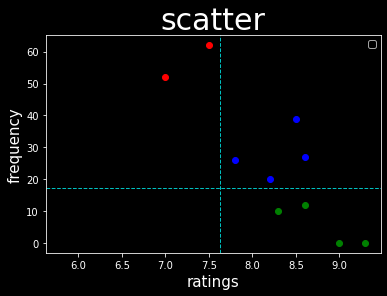

In [4]:

#繪圖
plt.figure()

#判斷四個象限所在的位置，來決定顏色
voice_list =[]
bean_list = []
axe_list = []
for i in range(len(bean)):
    if bean[i]>score_avg and mv_voice[i] >avg:#1_第一象限
        color = 'blue'
        axe = '1_第一象限'
        
    elif bean[i]>score_avg and mv_voice[i] <= avg:#4_第四象限
        color = 'green'
        axe = '4_第四象限'
        
    elif bean[i]<=score_avg and mv_voice[i] > avg:
        color = 'red'
        axe = '2_第二象限'
        
    else:#2_第二象限
        color = 'black'
        axe = '3_第三象限'
        
    plt.scatter(bean[i],mv_voice[i], color=color)
    
    voice_list.append(mv_voice[i])
    bean_list.append(bean[i])
    axe_list.append(axe)
    
    
plt.axhline(avg, color='c', linestyle='dashed', linewidth=1) # 繪製平均線 
plt.axvline(score_avg, color='c', linestyle='dashed', linewidth=1) # 繪製平均線    

plt.title("scatter",fontsize=30)#標題
plt.ylabel("frequency",fontsize=15)#y的標題
plt.xlabel("ratings",fontsize=15) #x的標題
plt.legend()
plt.show()


# 製作清單
voice_df = pd.DataFrame(voice_list, columns = ['聲量']) 
bean_df = pd.DataFrame(bean_list, columns = ['評分'] ) 
axe_df = pd.DataFrame(axe_list, columns = ['象限'] )     
final1 = pd.concat([voice_df,bean_df,axe_df], axis = 1)
final1['劇名']  = movie

# 問題：將final1根據「現象」由第一現象排序到第四現象（有錯誤：是「象限」）
final1 = final1.sort_values('象限')

# 問題：請問要將final1輸出csv？ 名稱為：評分與聲量圖.csv
final1.to_csv('評分與聲量圖.csv', 
              encoding = 'cp950')

In [5]:
final1

,聲量,評分,象限,劇名
2,27,8.6,1_第一象限,赤月青日
3,26,7.8,1_第一象限,神的測驗
4,39,8.5,1_第一象限,死之詠讚
8,20,8.2,1_第一象限,皮諾丘
1,62,7.5,2_第二象限,皇后的品格
13,52,7.0,2_第二象限,男朋友
0,4,6.9,3_第三象限,成為王的男人
6,9,6.8,3_第三象限,Priest驅魔者
9,14,5.9,3_第三象限,魔女寶鑑
10,0,6.7,3_第三象限,好運羅曼史


## 靜態成本效益評估分析

No handles with labels found to put in legend.


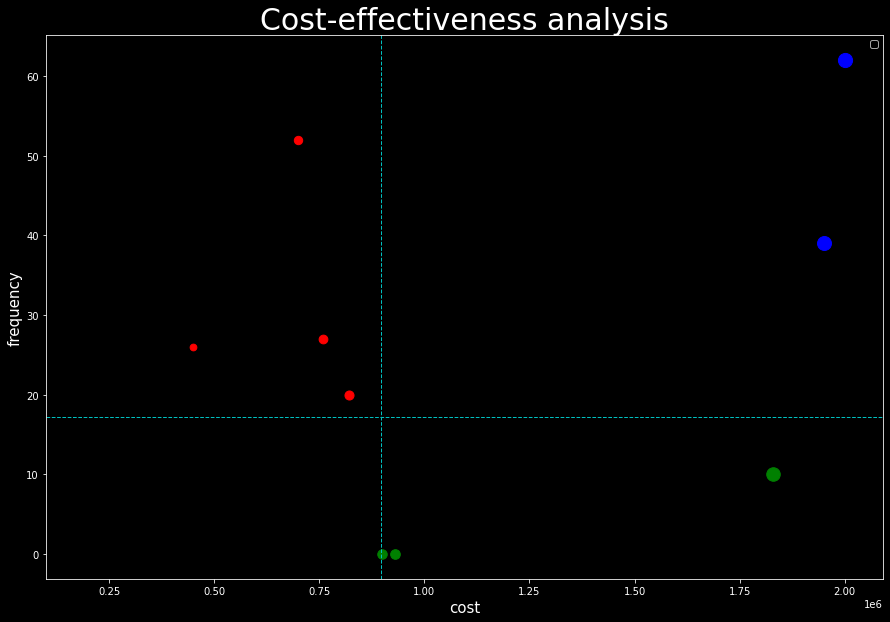

In [6]:

# 我們可不可以加入每一則影劇的成本？
# 問題：請讀取drama_cost.csv，並存到drama_cost裡面
drama_cost = pd.read_csv('drama_cost.csv',
                         encoding = 'cp950'
                         )

# 問題：計算drama_cost成本(cost)的平均（mean），作為X軸的分割線
avg_cost = drama_cost['cost'].mean()

fig = plt.figure(figsize=(15,10))
voice_list =[]
cost_list = []
axe_list = []
for i in range(len(drama_cost['cost'])):
    if drama_cost['cost'][i]>avg_cost and mv_voice[i] >avg:#1_第一象限
        color = 'blue'
        axe = '1_第一象限'
        
    elif drama_cost['cost'][i]>avg_cost and mv_voice[i] <= avg:#4_第四象限
        color = 'green'
        axe = '4_第四象限'
        
    elif drama_cost['cost'][i]<=avg_cost and mv_voice[i] > avg:#3_第三象限
        color = 'red'
        axe = '2_第二象限'
        
    else:#2_第二象限
        color = 'black'
        axe = '3_第三象限'
        
    plt.scatter(drama_cost['cost'][i],mv_voice[i], color=color, s = drama_cost['cost'][i]/10000)
    
    voice_list.append(mv_voice[i])
    cost_list.append(drama_cost['cost'][i])
    axe_list.append(axe)
    
    
plt.axhline(avg, color='c', linestyle='dashed', linewidth=1) # 繪製平均線 
plt.axvline(avg_cost, color='c', linestyle='dashed', linewidth=1) # 繪製平均線    

plt.title("Cost-effectiveness analysis",fontsize=30)#標題
plt.ylabel("frequency",fontsize=15)#y的標題
plt.xlabel("cost",fontsize=15) #x的標題
plt.legend()
plt.show()
fig.savefig('成本效益評估分析.png')


# 製作清單
voice_df = pd.DataFrame(voice_list, columns = ['聲量（關注程度）']) 
cost_df = pd.DataFrame(cost_list, columns = ['成本'] ) 
axe_df = pd.DataFrame(axe_list, columns = ['象限'] )     
final1 = pd.concat([voice_df,cost_df,axe_df], axis = 1)
final1['劇名']  = movie

# 將final1根據「現象」由第一現象排序到第四現象
final1 = final1.sort_values('象限')

# 請問要將final1輸出csv
final1.to_csv('成本效益評估分析.csv', encoding = 'cp950')

In [7]:
final1

,聲量（關注程度）,成本,象限,劇名
1,62,2000000,1_第一象限,皇后的品格
4,39,1950000,1_第一象限,死之詠讚
2,27,760000,2_第二象限,赤月青日
3,26,450000,2_第二象限,神的測驗
8,20,820000,2_第二象限,皮諾丘
13,52,700000,2_第二象限,男朋友
0,4,190000,3_第三象限,成為王的男人
6,9,480000,3_第三象限,Priest驅魔者
7,12,860000,3_第三象限,加油吧威基基
9,14,590000,3_第三象限,魔女寶鑑


## 動態圖製作 - 成本效益評估分析

In [9]:
import plotly.express as px

# 問題：
# x 為成本
# y 為聲量（關注程度）
# 以象限當做顏色點的區分
# size大小以成本區分
fig = px.scatter(final1,x = '成本',
                 y = '聲量（關注程度）',
                 size = '成本',
                 color = '象限',
                 hover_data=['劇名'])

fig
# plot(fig, filename='成本效益評估分析1.html')




In [10]:

# 接下來，我們要將X軸與Y軸放入動態圖中！
# 我們會使用的是 update_layout
fig.update_layout(
        
        title = '成本效益評估分析',
        shapes=[
        
        # 設定X軸
        dict({
            'type': 'line',
            'x0': avg_cost,
            'y0': -10,
            
            'x1': avg_cost,
            'y1': final1['聲量（關注程度）'].max()*1.1,
            'line': {
                'color': '#FF00FF',
                'width': 5
            }}),
    
        # 設定Y軸
        dict({
            'type': 'line',
            'x0': 0,
            'y0': avg,
            
            'x1': final1['成本'].max()*1.1,
            'y1': avg,
            'line': {
                'color': '#FF00FF',
                'width': 5
            }})
    
    ])
fig
# plot(fig, filename='成本效益評估分析2.html')